---
title: "Zero-Basis Banking vs. Active Trading"
subtitle: "A Comprehensive Evaluation Between USD/CAD Trading Methods"
author:
  - name: FINA6333 Data Analytics in Finance
  - name: Spring 2025
    affiliation: Northeastern University
number-sections: true
format:
    docx:
        font-size: 10pt  # Slightly reduces font size for better space usage
        line-spacing: 1.0  # Tighter spacing to fit more content per page
        page-margins: [0.6in, 0.6in, 0.6in, 0.6in]  # Slightly reduced margins
execute:
  echo: true
  enable: true
jupyter: python3
---

# Executive Summary

Objective: This project focuses on a critical decision facing our industry partner: whether to maintain their current Active Trading approach or transition to a Zero-Basis Banking (ZBA) strategy, which relies on passive or automatic trading for their multinational client. Our analysis centers on the USD/CAD currency pair, evaluating the financial implications of both strategies.

We conducted a comprehensive comparison of execution rates, transaction costs, and market volatility impact. We examined key cost components, including variable spreads, gamma costs, and market impact factors, to determine which approach offers superior cost efficiency and predictability.

## Methodology

Data Cleaning & Preprocessing:
Standardized exchange rate and trade transaction data.
Ensured timestamp alignment and removed missing values.

Strategy Comparison:
Compared client execution rates vs. market exchange rates to evaluate cost efficiency.
Quantified basis point (bps) differences between Active Trading and ZBA.
Analyzed total transaction costs for both approaches.

Volatility & Sensitivity Analysis:
Measured USD/CAD volatility trends and their impact on execution risk.
Conducted sensitivity analysis to assess how changes in spread and gamma affect total costs.

## Key Findings

Execution Rate Comparison:
Active Trading resulted in higher execution spreads, often deviating from market rates.
ZBA consistently provided lower transaction costs and more stable execution rates.

Transaction Cost Impact:
Active Trading led to higher overall transaction costs, reducing final USD holdings.
ZBA minimized costs, leading to higher retained USD values.

Volatility Considerations:
High market volatility increased execution risk in Active Trading.
ZBA remained cost-efficient even in volatile market conditions.

Sensitivity Analysis:
Transaction costs showed non-linear increases with small changes in spreads and gamma.
ZBA outperformed Active Trading in nearly all tested cost scenarios.

**Comparison of Active Trading vs. ZBA**

| Factor                      | Active Trading                                            | ZBA                                           |
|-----------------------------|-----------------------------------------------------------|-----------------------------------------------|
| **Trade Execution**         | Manual, based on market timing                            | Automated, follows set pricing strategy       |
| **Transaction Costs**       | Higher due to spreads & execution risk                    | Lower, predictable execution                  |
| **Market Volatility Impact**| High impact – execution costs increase in volatile markets | Minimal impact – stable execution             |
| **Final USD Value**         | Lower due to higher costs                                 | Higher due to lower costs                       |
| **Best Use Case**           | When traders can predict market trends accurately         | For consistent, cost-effective execution      |

Conclusion:
Our findings indicate that ZBA is a more cost-effective and predictable trading strategy for the industry partner. Active Trading incurs higher execution costs and introduces greater market risk, making it less favorable under current conditions. We recommend further optimization of trade execution timing for Active Trading and expanding the dataset for longer-term cost analysis.

# Introductory Remarks
This project focuses on a critical decision facing our industry partner: whether to maintain their current active trading approach or transition to a new zero-basis banking (ZBA) strategy with passive or automatic trading for their multinational client. Our analysis centers on the USD/CAD currency pair. We will delve into the intricacies of both trading strategies, considering all transaction costs, including variable spreads and market impact factors. Our goal is to provide a comprehensive comparison that will inform strategic decision-making.

Active trading and Zero-Basis Banking (ZBA) are two distinct approaches to foreign exchange (forex) management:
                 
**Active Trading Approach :** Active trading strategy is a strategy that requires a very hands on approach which involves constantly monitoring markets. Active traders seek profits from short term price fluctuations. Active trading has several benefits. One of the main advantages is the potential for high returns. Because active traders make numerous trades, they have the opportunity to profit from even small price movements. This can result in higher returns compared to passive trading strategies. Another benefit of active trading is the ability to manage risk. Active traders can use stop-loss orders and other risk management tools to limit their losses. This can be particularly beneficial in volatile markets. One of the main risks is the potential for significant losses. Because active traders make numerous trades, they are exposed to the risk of multiple losses. Additionally, the cost of trading can add up, as each trade involves a commission or fee.


**Zero Basis Banking Approach (ZBA) :** ZBA is a more passive approach to Forex management, automating currency conversions at pre-determined rates. Unlike active trading, ZBA approaches prioritize risk management and operational efficiency over speculative profits from market movements. 
Benefits of ZBA include cost reduction by minimizing the need for frequent forex transactions, ZBA can significantly reduce associated transaction costs. It simplifies FX Strategy allowing to focus more on longer-term hedging needs rather than day-to-day currency management. It leads to enhanced Liquidity Management There is eeduced forex exposure, further reducing costs and risk.

The choice between active trading and ZBA depends on factors such as risk tolerance, resources available for market analysis, and the specific needs of the organization managing its forex exposure. 

# Importing Libraries

In [33]:
#Importing required libraries
import pandas as pd
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import matplotlib.ticker as mtick
import seaborn as sns  # Statistical visualization
import openpyxl  # To read Excel files
import os  # File handling
import requests
import pdfplumber
plt.style.use('ggplot')
sns.set_theme()


# Data Wrangling
## Read Data

In [34]:
#Loading datasets
USDCAD_df = pd.read_excel(io='USDCAD 021325.xlsx', sheet_name='Sheet1', names=['Date', 'USDCAD'], parse_dates=['Date'])
NEUTRADES_df = pd.read_excel('NE University Trades.xlsx',  
                          sheet_name='Sheet1', skiprows = 2)
NEUTRADES_df.columns = ['Date', 'Time', 'Interbank Rate', 'Avg IB Rate', 
                     'Diff IB Rate (bps)', 'Client Rate', 'Sell CAD', 
                     'Buy USD', 'Spread', 'Profit', 'Savings']

## Clean Data

In [36]:
# Checking and filtering non-date values in 'Date' column
USDCAD_df = USDCAD_df[pd.to_datetime(USDCAD_df['Date'], errors='coerce').notna()]
NEUTRADES_df = NEUTRADES_df[pd.to_datetime(NEUTRADES_df['Date'], errors='coerce').notna()]
# Converting 'Date' column to datetime format
USDCAD_df['Date'] = pd.to_datetime(USDCAD_df['Date'])
NEUTRADES_df['Date'] = pd.to_datetime(NEUTRADES_df['Date'])
# Sorting by date
USDCAD_df.sort_values('Date', inplace=True)
NEUTRADES_df.sort_values('Date', inplace=True)
# Converting 'Sell CAD' column into numerical format
def convert_tonum(value):
    value = str(value)
    if 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    return pd.to_numeric(value, errors='coerce')
NEUTRADES_df['Sell CAD'] = NEUTRADES_df['Sell CAD'].apply(convert_tonum)


# Trade Sizes

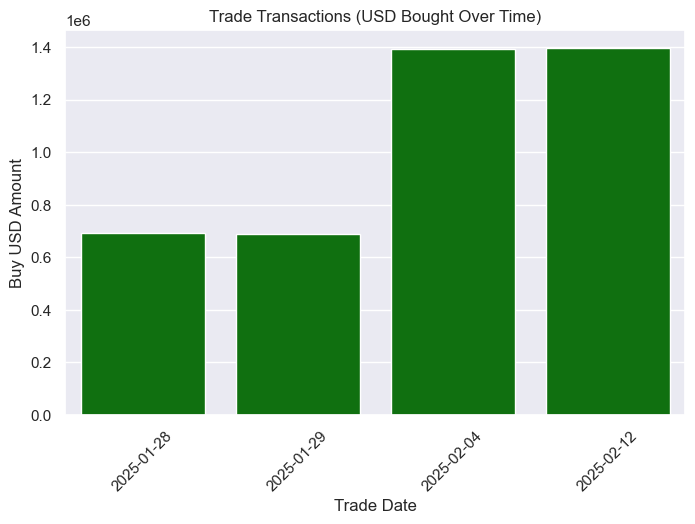

In [21]:
# Plotting trade sizes
plt.figure(figsize=(5, 3))
sns.barplot(x=NEUTRADES_df['Date'], y=NEUTRADES_df['Buy USD'], color='green')
plt.xlabel('Trade Date')
plt.ylabel('Buy USD Amount')
plt.title('Trade Transactions (USD Bought Over Time)')
plt.xticks(rotation=45)
plt.show()

The above bar graph depicts the data shared by industry partners in relation to the amount of USD purchased in order to execute 4 client transactions. While these are the only available transactions for comparison we believe that the sample size is too small in order to obtain a definitive conclusion on whether ZBA approach is more beneficial than the active trading approach.

# USD/CAD Exchange Rate Analysis
## Historical Exchange Rate & Volatility

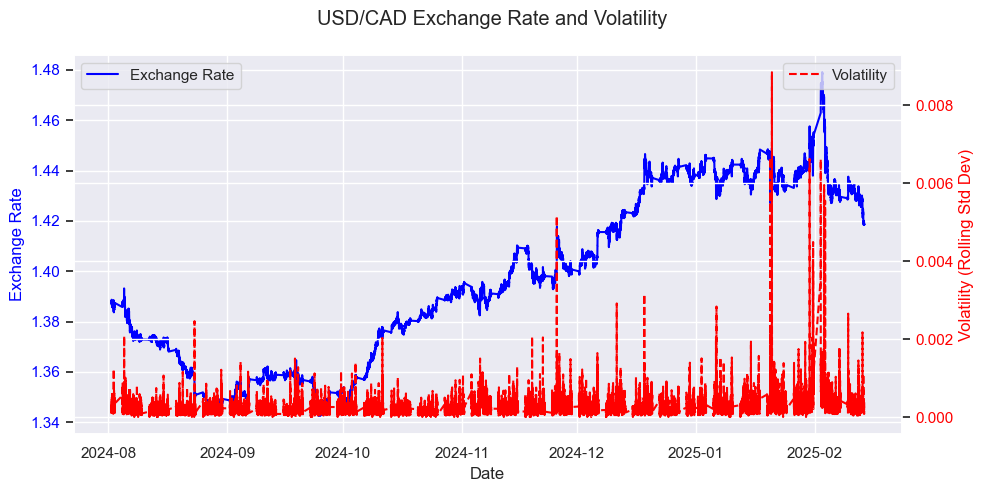

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
#Ensure 'Date' column is in datetime format
USDCAD_df['Date'] = pd.to_datetime(USDCAD_df['Date'])
#Ensure data is sorted by date
USDCAD_df.sort_values('Date', inplace=True)
#Recalculate Volatility Before Plotting
window_size = 7  # 7-day rolling window for volatility
USDCAD_df['Volatility'] = USDCAD_df['USDCAD'].rolling(window=window_size).std()
#Drop NaN values created due to rolling calculation
USDCAD_df.dropna(inplace=True)
#Plot Exchange Rate and Volatility in One Graph
fig, ax1 = plt.subplots(figsize=(7, 4))
# First y-axis for Exchange Rate
ax1.plot(USDCAD_df['Date'], USDCAD_df['USDCAD'], color='blue', label='Exchange Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Exchange Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Second y-axis for Volatility
ax2 = ax1.twinx()
ax2.plot(USDCAD_df['Date'], USDCAD_df['Volatility'], color='red', linestyle='dashed', label='Volatility')
ax2.set_ylabel('Volatility (Rolling Std Dev)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Add titles and legend
fig.suptitle('USD/CAD Exchange Rate and Volatility')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.tight_layout()
plt.show()

The graph displays the USD/CAD exchange rate and its volatility over the period under consideration of August 2024 to February 2025. It can be observed that after a small dip in September 2024, USD rises peaking in early February 2025. The significant depreciation of the Canadian Currency is attributed to widening interest rate differentials between Canada and the USA, economic performance disparities, with the USA showing more robust growth compared to Canada and global economic conditions, including trade relationships and commodity prices.  

## Rate Analysis
### Client Rate vs ZBA Execution Rate

             DateTime  Client Rate  ZBA Execution Rate  \
0 2025-01-28 10:18:07       1.4438              1.4389   
1 2025-01-29 08:29:55       1.4496              1.4450   
2 2025-02-04 15:28:09       1.4374              1.4317   
3 2025-02-12 09:42:37       1.4341              1.4330   

   Difference in rates (bps)  
0                       49.0  
1                       46.0  
2                       57.0  
3                       11.0  


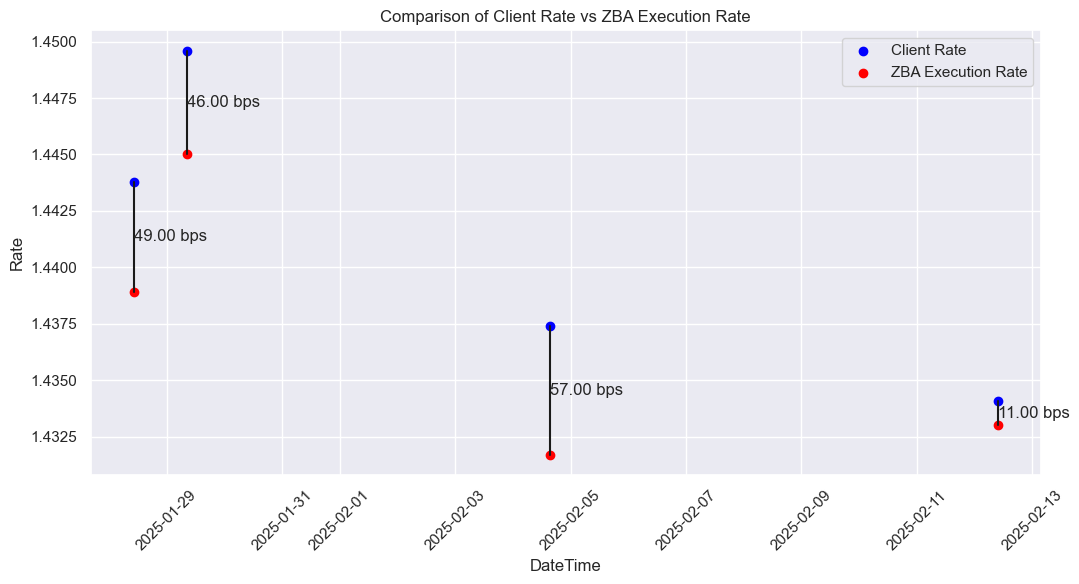

In [51]:
# Simulating passive trading using ZBA (proposed approach)
USDCAD_df['DateTime'] = pd.to_datetime(USDCAD_df['Date'])
NEUTRADES_df['DateTime'] = pd.to_datetime(NEUTRADES_df['Date'].astype(str) + ' ' + NEUTRADES_df['Time'].astype(str))
USDCAD_df = USDCAD_df.sort_values('DateTime')
NEUTRADES_df = NEUTRADES_df.sort_values('DateTime')

# Merging trade data with market exchange rates to find the closest past rate
merged_df = pd.merge_asof(NEUTRADES_df, USDCAD_df, on = 'DateTime', direction = 'backward')
merged_df.head()

# Converting CAD values in the trades data to numeric values
merged_df['Sell CAD'] = pd.to_numeric(merged_df['Sell CAD'], errors = 'coerce')
merged_df['ZBA - BUY USD'] = merged_df['Sell CAD'] / merged_df['USDCAD']

# Calculating the impact of using ZBA
merged_df['ZBA Execution Rate'] = merged_df['USDCAD']
merged_df['Difference in rates (bps)'] = (merged_df['Client Rate'] - merged_df['ZBA Execution Rate'])*10000 
print(merged_df[['DateTime', 'Client Rate', 'ZBA Execution Rate', 'Difference in rates (bps)']])
plt.figure(figsize=(11, 6))
plt.scatter(merged_df['DateTime'], merged_df['Client Rate'], label='Client Rate', color='blue')
plt.scatter(merged_df['DateTime'], merged_df['ZBA Execution Rate'], label='ZBA Execution Rate', color='red')
for i, row in merged_df.iterrows():
    plt.plot([row['DateTime'], row['DateTime']], [row['Client Rate'], row['ZBA Execution Rate']], 'k-')
    mid_y = (row['Client Rate'] + row['ZBA Execution Rate']) / 2
    plt.text(row['DateTime'], mid_y, f"{row['Difference in rates (bps)']:.2f} bps", ha='left', va='center', fontsize=12)
plt.xlabel('DateTime')
plt.ylabel('Rate')
plt.title('Comparison of Client Rate vs ZBA Execution Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart compares the client rate against the ZBA execution rate. as seen in the difference in rates, ZBA rate is lower by 0.11%-0.57%  premium. This premium can be the difference of millions to billions of with one transaction depending on the client. Because of this, ZBA trading strategy offers better results for a company's bottom line.

Trading Performance Analysis


,DateTime,Trading Rate,Market High,Market Average,90th Percentile,vs High (bps),vs Average (bps),vs Percentile (bps)
0,2025-01-28 10:18:07,1.44380,1.44180,1.43988,1.44100,20.0,39.2,28.0
1,2025-01-29 08:29:55,1.44960,1.44690,1.44222,1.44430,27.0,73.8,53.0
2,2025-02-04 15:28:09,1.43740,1.44940,1.43739,1.44523,-120.0,0.1,-78.3
3,2025-02-12 09:42:37,1.43410,1.43380,1.42958,1.43120,3.0,45.2,29.0


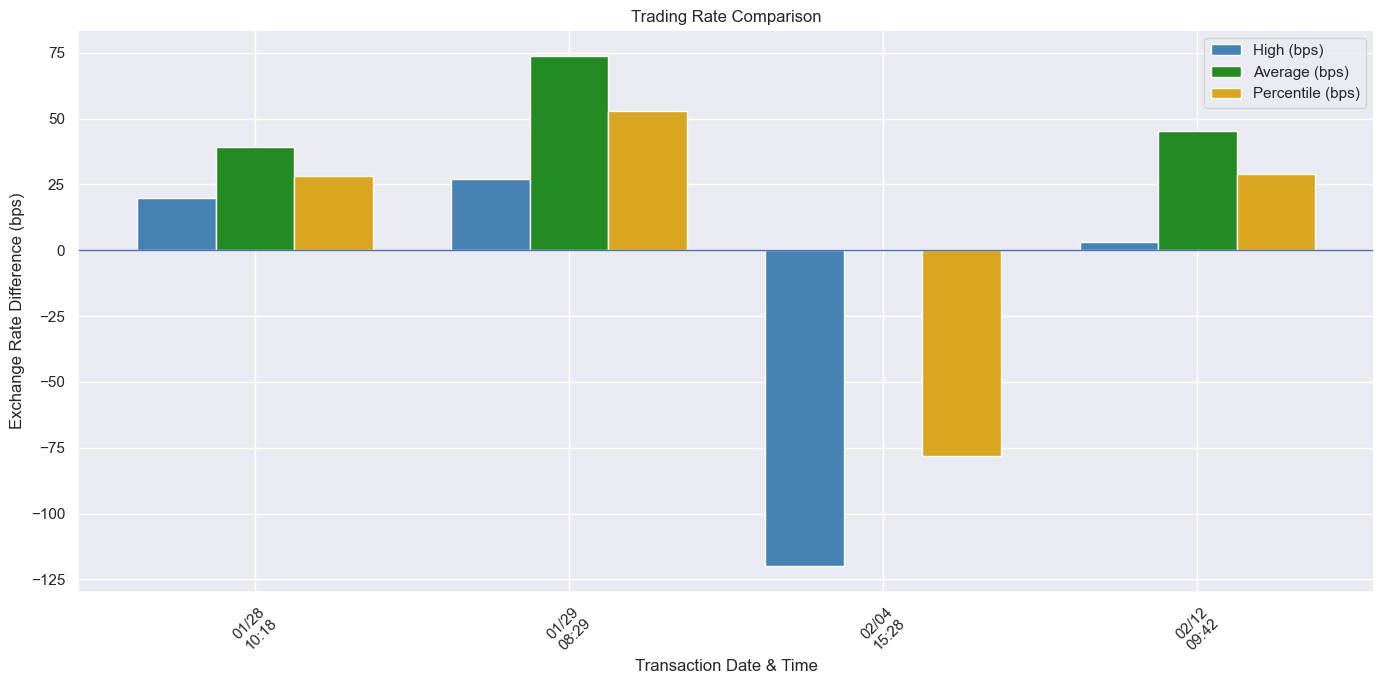

In [63]:
currency_data = USDCAD_df.copy()
trade_records = NEUTRADES_df.copy()

currency_data['DateTime'] = pd.to_datetime(currency_data['Date'])
trade_records['DateTime'] = pd.to_datetime(
    trade_records['Date'].astype(str) + ' ' + trade_records['Time'].astype(str),
    errors='coerce'
)

currency_data = currency_data.sort_values('DateTime')
trade_records = trade_records.dropna(subset=['DateTime']).sort_values('DateTime')

combined_data = pd.merge_asof(
    trade_records,
    currency_data[['DateTime', 'USDCAD']],
    on='DateTime',
    direction='backward'
)
combined_data['Sell CAD'] = pd.to_numeric(combined_data['Sell CAD'], errors='coerce')
analysis_dates = combined_data['DateTime'].dt.normalize().unique()
filtered_rates = currency_data[currency_data['DateTime'].dt.normalize().isin(analysis_dates)]
daily_metrics = (
    filtered_rates.set_index('DateTime')
    .groupby(pd.Grouper(freq='D'))
    .agg(
        DailyHigh=('USDCAD', 'max'),
        DailyAverage=('USDCAD', 'mean'),
        Daily90Percentile=('USDCAD', lambda x: x.quantile(0.9))
    )
    .reset_index()
    .rename(columns={
        'DailyHigh': 'Market High',
        'DailyAverage': 'Market Average',
        'Daily90Percentile': '90th Percentile'
    })
)
combined_data['Trade_Date'] = combined_data['DateTime'].dt.normalize()
combined_data = pd.merge(
    combined_data,
    daily_metrics,
    left_on='Trade_Date',
    right_on='DateTime',
    suffixes=('', '_metric')
).drop(columns=['Trade_Date', 'DateTime_metric'])
combined_data['Trading Rate'] = combined_data['Client Rate']
benchmarks = ['Market High', 'Market Average', '90th Percentile']
for benchmark in benchmarks:
    combined_data[f'vs {benchmark.split()[-1]} (bps)'] = (
        (combined_data['Trading Rate'] - combined_data[benchmark]) * 10000
    )

report_columns = [
    'DateTime', 'Trading Rate', 
    'Market High', 'Market Average', '90th Percentile',
    'vs High (bps)', 'vs Average (bps)', 'vs Percentile (bps)'
]

performance_report = combined_data[report_columns]

print("Trading Performance Analysis")
display(performance_report.style.format({
    'Trading Rate': '{:.5f}',
    'Market High': '{:.5f}',
    'Market Average': '{:.5f}',
    '90th Percentile': '{:.5f}',
    'vs High (bps)': '{:.1f}',
    'vs Average (bps)': '{:.1f}',
    'vs Percentile (bps)': '{:.1f}'
}))
plt.figure(figsize=(14, 7))
bar_colors = ['steelblue', 'forestgreen', 'goldenrod']
bar_positions = np.arange(len(combined_data))

for i, metric in enumerate(['vs High (bps)', 'vs Average (bps)', 'vs Percentile (bps)']):
    plt.bar(
        bar_positions + i*0.25,
        combined_data[metric],
        width=0.25,
        color=bar_colors[i],
        label=metric.replace('vs ', '')
    )

plt.axhline(0, linewidth=1)
plt.title('Trading Rate Comparison')
plt.xlabel('Transaction Date & Time')
plt.ylabel('Exchange Rate Difference (bps)')
plt.legend()
plt.xticks(
    bar_positions + 0.25,
    combined_data['DateTime'].dt.strftime('%m/%d\n%H:%M'),
    rotation=45
)
plt.tight_layout()
plt.legend()
plt.show()

We assume that the execution time of the active trade and the ZBA trade is the same. However, in reality, trades may not occur instantaneously, and banks may apply a different rate than the prevailing market rate at the time of execution. As a result, despite negligible transaction costs, the overall cost of purchasing the currency may increase.

It is evident that the exchange rate statistics and the rate charged by the industry partner vary. However, due to the small sample size, we cannot conclusively determine whether this difference persists across different transaction dates. Therefore, we assume that ZBA transactions are executed simultaneously with active trades. Our observations may change if we compare the executed exchange rate to a different benchmark exchange rate.

# ZBA vs Active Trading

## Transaction Costs
### Fee Comparison

In [56]:
# Calculating transaction costs with active trading and using ZBA
# Total cost for active trading
spread = 0.0030
merged_df['Transaction cost_Active'] = (0.5 * spread * merged_df['Sell CAD']) 
# Total cost for passive trading using ZBA
##########################################################################################
# Scraping the web for ZBA service fees
# URL for the PDF
url = 'https://www.bancfirst.bank/BancFirst/media/Documents/NewDisclosureDocs/ZBA.pdf'
# Setting a header to mimic a typical web browser to help bypass restrictions
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.3 Safari/605.1.15"}
# Requesting the PDF
response = requests.get(url, headers = headers)
# Checking if the response is valid and it appears to be a PDF
if response.status_code == 200 and response.content.startswith(b'%PDF'):
    pdf_filename = 'ZBA fee schedule.pdf'
    with open(pdf_filename, 'wb') as f:
        f.write(response.content)
    print("PDF saved as: ", pdf_filename)
    # Parse the PDF using pdfplumber
    with pdfplumber.open(pdf_filename) as pdf:
        for page in pdf.pages:
            table = page.extract_table()
            if table:
                for row in table:
                    if 'Setup Fee' in row[0]:
                        ZBA_SETUP_FEE = float(row[1].replace('$', ''))
                    if 'Master Monthly Fee' in row[0]:
                        ZBA_MASTER_MONTHLY_FEE = float(row[1].replace('$', ''))
                    if 'Sub Acct Monthly Fee' in row[0]:
                        ZBA_SUB_ACCOUNT_MONTHLY_FEE = float(row[1].replace('$', ''))
                break
else:
    print("Failed to retrieve PDF. Response status code:", response.status_code)
##########################################################################################
# Count the trades per month to distribute ZBA fees
merged_df['Month'] = merged_df['DateTime'].dt.to_period('M')
monthly_trade_count = merged_df.groupby('Month').size()
merged_df['No. of trades in a month'] = merged_df['Month'].map(monthly_trade_count)
# Calculating the total ZBA fee
merged_df['ZBA fee per trade'] = (ZBA_MASTER_MONTHLY_FEE + ZBA_SUB_ACCOUNT_MONTHLY_FEE)/merged_df['No. of trades in a month']
print(merged_df[['DateTime', 'Transaction cost_Active', 'ZBA fee per trade']])

PDF saved as:  ZBA fee schedule.pdf
             DateTime  Transaction cost_Active  ZBA fee per trade
0 2025-01-28 10:18:07                   1500.0               15.0
1 2025-01-29 08:29:55                   1500.0               15.0
2 2025-02-04 15:28:09                   3000.0               15.0
3 2025-02-12 09:42:37                   3000.0               15.0


The typical fees associated with using ZBA account in FX trading can include spreads, commissions, swap fees (overnight financing), ZBA specific fees such as a master account monthly fee or a transaction fee, account maintenance fees and withdrawal fees.
In the above example, we're using the ZBA service fee schedule of BancFirst, which lays out the ZBA specific fees. The master monthly fee, and the sub account monthly fee are assumed to be allocated across all the trades that occur. 

In relation to active trading, we are adopting the spread of 30 basis points as informed by the industry partner. 

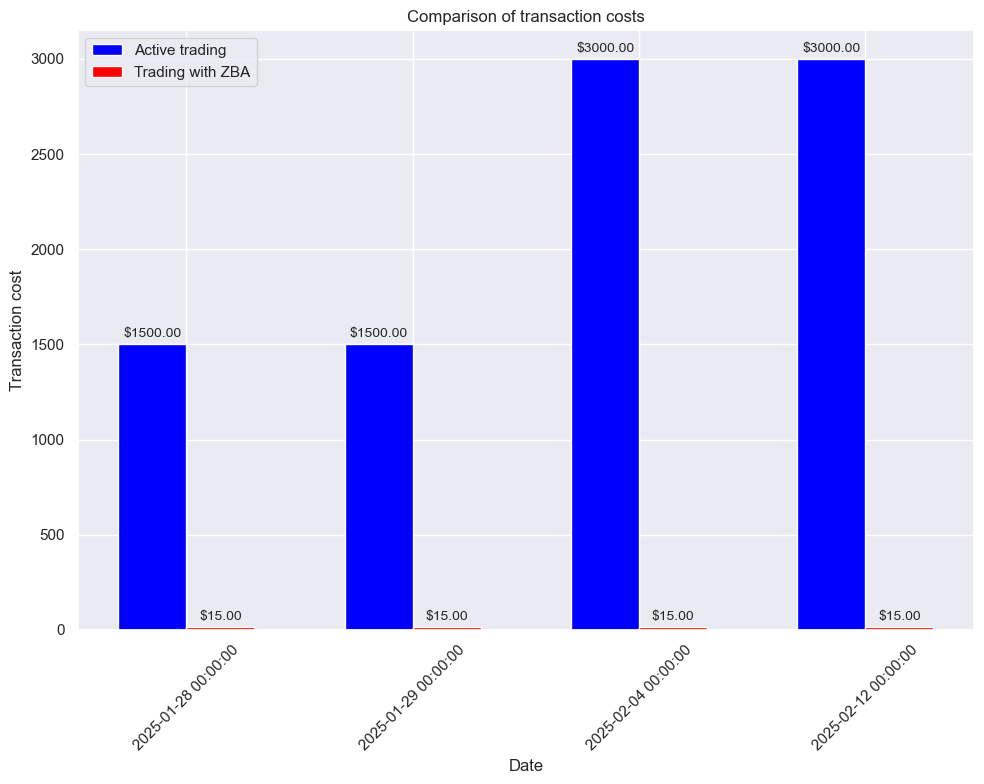

In [57]:
# Comparison of transaction costs 
plt.figure(figsize = (10, 8))
x = np.arange(len(merged_df['Date_x']))
width = 0.3
bars1 = plt.bar(x - width/2, merged_df['Transaction cost_Active'], width, label = 'Active trading', color = 'blue')
bars2 = plt.bar(x + width/2, merged_df['ZBA fee per trade'], width, label = 'Trading with ZBA', color = 'red')
plt.bar_label(bars1, padding = 3, fmt = '$%.2f', fontsize = '10')
plt.bar_label(bars2, padding = 3, fmt = '$%.2f', fontsize = '10')
plt.xlabel('Date')
plt.ylabel('Transaction cost')
plt.title('Comparison of transaction costs')
plt.legend()
plt.xticks(x, merged_df['Date_x'], rotation = 45)
plt.tight_layout()
plt.show()

Further drilling down into the data, it is clear that the ZBA strategy's outperformance is largely driven by transaction cost savings. Across all dates, the ZBA strategy transaction costs are only 15 dollars, while active strategy transaction costs can range from 1500 to 3000 dollars. Active trading strategy is aimed for certain market condition and short-term trading like days, minutes, hours; however, ZBA can be appealing because it minimizes the the repeated trading that can reduce or offset transaction fees.

## Final Values

             DateTime  Client Rate  ZBA Execution Rate  \
0 2025-01-28 10:18:07       1.4438              1.4389   
1 2025-01-29 08:29:55       1.4496              1.4450   
2 2025-02-04 15:28:09       1.4374              1.4317   
3 2025-02-12 09:42:37       1.4341              1.4330   

   Final USD value_Active  Final USD value_ZBA  
0               692601.71         6.949603e+05  
1               689825.72         6.920265e+05  
2              1391405.50         1.396926e+06  
3              1394626.79         1.395658e+06  


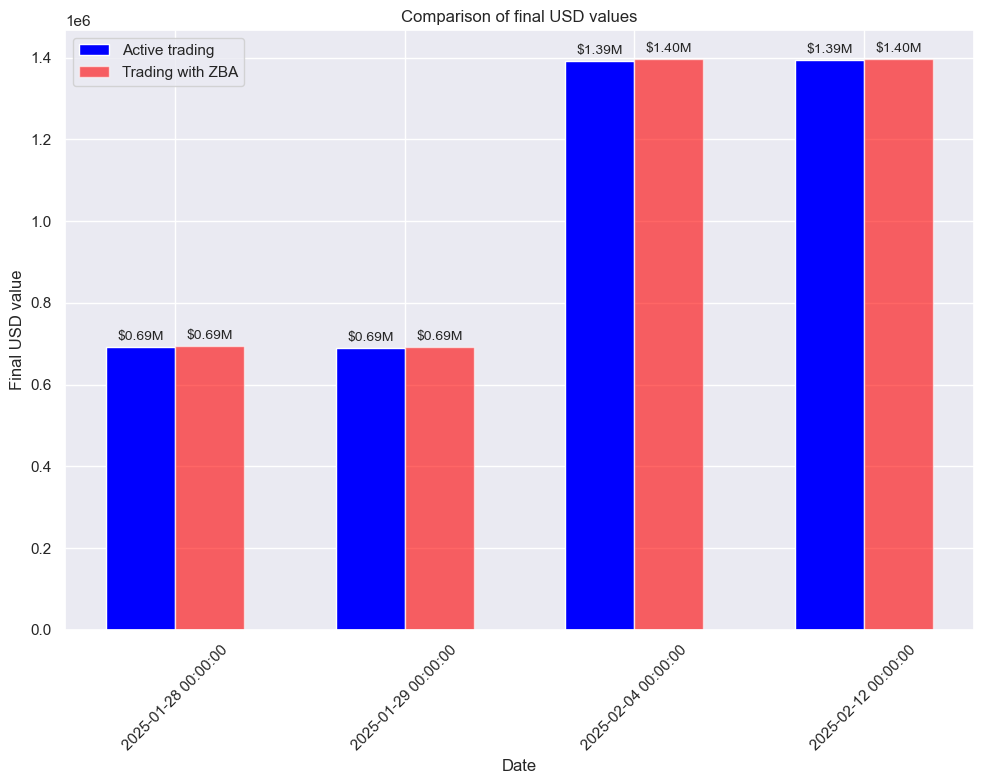

In [62]:
# Comparison of final values of USD obtained using both the strategies
merged_df['Final USD value_Active'] = merged_df['Buy USD'] - merged_df['ZBA fee per trade']
merged_df['Final USD value_ZBA'] = merged_df['ZBA - BUY USD'] - merged_df['ZBA fee per trade']
print(merged_df[['DateTime', 'Client Rate', 'ZBA Execution Rate', 'Final USD value_Active', 'Final USD value_ZBA']])
plt.figure(figsize = (10, 8))
x = np.arange(len(merged_df['Date_x']))
width = 0.3
bars1 = plt.bar(x - width/2, merged_df['Final USD value_Active'], width, label = 'Active trading', color = 'blue')
bars2 = plt.bar(x + width/2, merged_df['Final USD value_ZBA'], width, label = 'Trading with ZBA', color = 'red', alpha = 0.6)
plt.bar_label(bars1, labels=[f'${val / 1_000_000:.2f}M' for val in merged_df['Final USD value_Active']], padding = 3, fontsize = '10')
plt.bar_label(bars2, labels=[f'${val / 1_000_000:.2f}M' for val in merged_df['Final USD value_ZBA']], padding = 3, fontsize = '10')
plt.xlabel('Date')
plt.ylabel('Final USD value')
plt.title('Comparison of final USD values')
plt.legend()
plt.xticks(x, merged_df['Date_x'], rotation = 45)
plt.tight_layout()
plt.show()

Based on the bar graph above, the ZBA strategy results in a similar but slightly higher final USD value. Across all four dates, the ZBA outperforms the active trading strategy. 

## Cost Impact Analysis

In [61]:
#Cost Impact per $1M traded
def cost_per_million(bps_diff):
    return (bps_diff / 10000) * 1_000_000  # Convert bps to dollar impact
bps_differences = [49, 46, 57, 11]
cost_impact = [cost_per_million(bps) for bps in bps_differences]
cost_df = pd.DataFrame({
    "Trade Date": ["2025-01-29", "2025-01-31", "2025-02-05", "2025-02-13"],
    "Bps Difference": bps_differences,
    "Cost Impact per $1M": cost_impact
})
from IPython.display import display
display(cost_df)

,Trade Date,Bps Difference,Cost Impact per $1M
0,2025-01-29,49,4900.0
1,2025-01-31,46,4600.0
2,2025-02-05,57,5700.0
3,2025-02-13,11,1100.0


The table above illustrates the real-dollar cost impact per $1M traded based on the basis point (bps) differences observed between Active Trading and Zero-Basis Banking (ZBA). It quantifies the additional cost incurred due to execution spreads, providing a clearer financial perspective on the relative efficiency of each strategy. Higher bps differences lead to increased costs, reinforcing the finding that ZBA consistently minimizes transaction costs, making it the more cost-effective approach for large-scale currency transactions.

# Conclusion
Based on the data provided, our analysis suggests that Zero-Basis Banking (ZBA) could offer notable advantages over Active Trading for managing USD/CAD transactions. ZBA consistently shows lower transaction costs and more stable performance, even when market conditions are volatile, which helps preserve a higher final USD value. In contrast, Active Trading tends to incur higher fees and is more vulnerable to the unpredictable swings of the market due to its reliance on manual, timing-based execution.

However, it's important to note that these insights come from a relatively small sample size. While the initial results are promising and indicate that ZBA may be a more cost-effective and reliable strategy, further research with a larger dataset is essential to confirm these findings. 